# This file contains :
## 1. Plot trajectories
## 2. Compute transformation matrix

In [7]:
import numpy as np
import csv
import os
import scipy
from scipy.spatial.transform import Rotation as R_scipy
from datetime import datetime, timezone
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Ellipse
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from read_calibration_file import *
from point_to_point import *
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'scipy'

In [ ]:
date = '2023_07_25'
rover_type = 'Trimble_R10/'
path = os.path.expanduser('~') + '/Master_thesis/ICRA2024_Effie_Daum/GNSS_Data/' + rover_type + date + '/'

## 1. Plot Trajectories, data frames contains :

point ID,
Easting,
Northing,
Orthometric Altitude (CGVD28),
Horizontal Precision,
Vertical Precision,
PDOP,
Sats,
Date,
Time

In [ ]:
# df1 = pd.read_csv(path + 'rover_1.csv', header=0)
# df2 = pd.read_csv(path + 'rover_2.csv', header=0)
# df3 = pd.read_csv(path + 'rover_3.csv', header=0)


df1_traj_1 = pd.read_csv(path + '2023-07-25' + '-1_rover_1_raw.csv', header=0, delimiter= ';')
df2_traj_1 = pd.read_csv(path + '2023-07-25' + '-1_rover_2_raw.csv', header=0, delimiter= ';')
df3_traj_1 = pd.read_csv(path + '2023-07-25' + '-1_rover_3_raw.csv', header=0, delimiter= ';')

df1_traj_2 = pd.read_csv(path + '2023-07-25' + '-2_rover_1_raw.csv', header=0, delimiter= ';')
df2_traj_2 = pd.read_csv(path + '2023-07-25' + '-2_rover_2_raw.csv', header=0, delimiter= ';')
df3_traj_2 = pd.read_csv(path + '2023-07-25' + '-2_rover_3_raw.csv', header=0, delimiter= ';')

df1_traj_3 = pd.read_csv(path + '2023-07-25' + '-3_rover_1_raw.csv', header=0, delimiter= ';')
df2_traj_3 = pd.read_csv(path + '2023-07-25' + '-3_rover_2_raw.csv', header=0, delimiter= ';')
df3_traj_3 = pd.read_csv(path + '2023-07-25' + '-3_rover_3_raw.csv', header=0, delimiter= ';')

## 1.0 Compute Timestamp from Time

In [ ]:
for df in [df1_traj_1, df2_traj_1, df3_traj_1, df1_traj_2, df2_traj_2, df3_traj_2, df1_traj_3, df2_traj_3, df3_traj_3] :
    df["Datetime"] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%Y-%m-%d %H:%M:%S')
    df['Timestamp'] = df["Datetime"].values.astype(np.int64) // 10 ** 9
    df.drop(["Date", "Time"], axis=1, inplace=True)

## 1.1 Plot GNSS trajectory 1

In [ ]:
# 2D figure
%matplotlib inline
fig, axs = plt.subplots(figsize=(10, 5.5), nrows=1, ncols=2, constrained_layout = True)
ax = axs[0]
ax2 = axs[1]
ax.plot(df1_traj_1['Easting'], df1_traj_1['Northing'], c='#89ABE3', label='antenne 1', alpha = 0.7)
ax.plot(df2_traj_1['Easting'], df2_traj_1['Northing'], c='#EA738D', label='antenne 2', alpha = 0.7)
ax.plot(df3_traj_1['Easting'], df3_traj_1['Northing'], c='#E3B448', label='antenne 3', alpha = 0.7)

ax.set_xlabel('Coordonnées Est [m]')
ax.set_ylabel('Coordonnées Nord [m]')
ax.set_title('Trajectoire GNSS')
ax.set_aspect('equal')
ax.legend(loc = 'lower left')
plt.legend()

sc = ax2.scatter(df1_traj_1['Easting'], df1_traj_1['Northing'],c=df1_traj_1['Sats'], cmap='plasma', s=df1_traj_1['Sats'], alpha=0.7)

divider = make_axes_locatable(ax2)
cbar = plt.colorbar(sc, orientation='horizontal', shrink = 0.65)
cbar.set_ticks([np.min(df1_traj_1['Sats']), np.max(df1_traj_1['Sats'])])
cbar.ax.set_xticklabels([f"${int(np.min(df1_traj_1['Sats']))}$", f"${int(np.max(df1_traj_1['Sats']))}$"])
cbar.set_label('nb. satellites')

ax2.set_xlabel('Coordonnées Est [m]')
ax2.set_ylabel('Coordonnées Nord [m]')
ax2.set_title('Précision de la trajectoire GNSS')
ax2.set_aspect('equal')

plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax2.get_xticklabels(), rotation=30, horizontalalignment='right')



ModuleNotFoundError: No module named 'matplotlib'

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

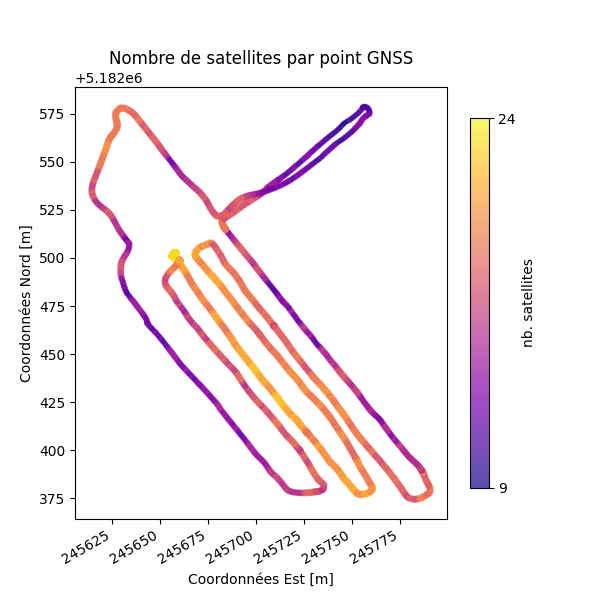

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
sc = ax.scatter(df1_traj_1['Easting'], df1_traj_1['Northing'],c=df1_traj_1['Sats'], cmap='plasma', s=df1_traj_1['Sats'], alpha=0.7)

divider = make_axes_locatable(ax2)
cbar = plt.colorbar(sc, shrink = 0.8)
cbar.set_ticks([np.min(df1_traj_1['Sats']), np.max(df1_traj_1['Sats'])])
# cbar.ax.set_xticklabels([f"${int(np.min(df1_traj_1['Sats']))}$", f"${int(np.max(df1_traj_1['Sats']))}$"])
cbar.set_label('nb. satellites')

ax.set_xlabel('Coordonnées Est [m]')
ax.set_ylabel('Coordonnées Nord [m]')
ax.set_title('Nombre de satellites par point GNSS')
ax.set_aspect('equal')

plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

## 1.2 Plot GNSS trajectory 2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

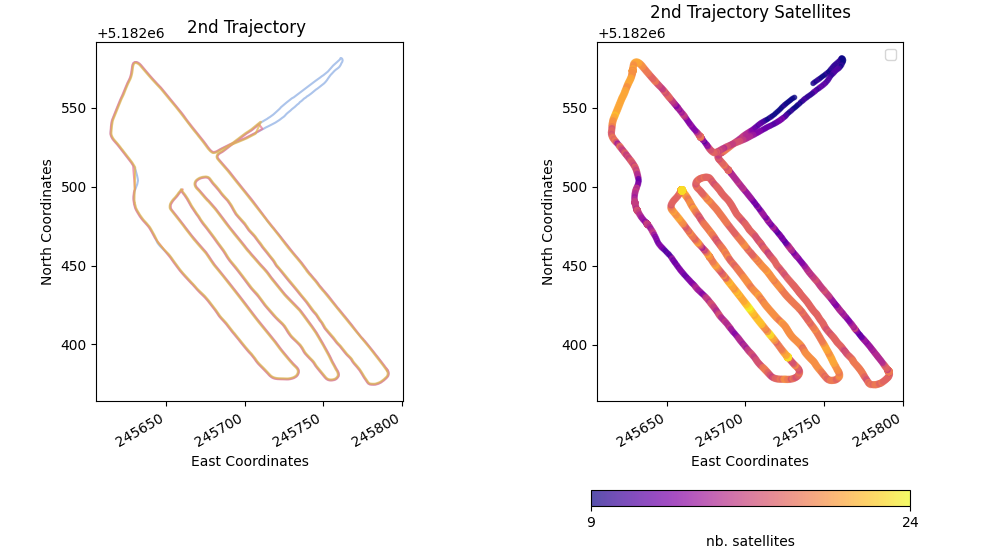

In [ ]:
# 2D figure
%matplotlib widget
fig, axs = plt.subplots(figsize=(10, 5.5), nrows=1, ncols=2, constrained_layout = True)
ax = axs[0]
ax2 = axs[1]
ax.plot(df1_traj_2['Easting'], df1_traj_2['Northing'], c='#89ABE3', label='antenna 1', alpha = 0.7)
ax.plot(df2_traj_2['Easting'], df2_traj_2['Northing'], c='#EA738D', label='antenna 2', alpha = 0.7)
ax.plot(df3_traj_2['Easting'], df3_traj_2['Northing'], c='#E3B448', label='antenna 3', alpha = 0.7)

ax.set_xlabel('East Coordinates')
ax.set_ylabel('North Coordinates')
ax.set_title('2nd Trajectory ')
ax.set_aspect('equal')
plt.legend()

sc = ax2.scatter(df1_traj_2['Easting'], df1_traj_2['Northing'],c=df1_traj_2['Sats'], cmap='plasma', s=df1_traj_2['Sats'], alpha=0.7)

divider = make_axes_locatable(ax2)
cbar = plt.colorbar(sc, orientation='horizontal', shrink = 0.65)
cbar.set_ticks([np.min(df1_traj_2['Sats']), np.max(df1_traj_2['Sats'])])
cbar.ax.set_xticklabels([f"${int(np.min(df1_traj_2['Sats']))}$", f"${int(np.max(df1_traj_2['Sats']))}$"])
cbar.set_label('nb. satellites')
ax2.set_xlabel('East Coordinates')
ax2.set_ylabel('North Coordinates')
ax2.set_title('2nd Trajectory Satellites')
ax2.set_aspect('equal')

plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax2.get_xticklabels(), rotation=30, horizontalalignment='right')

## 1.3 Plot GNSS trajectory 3

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

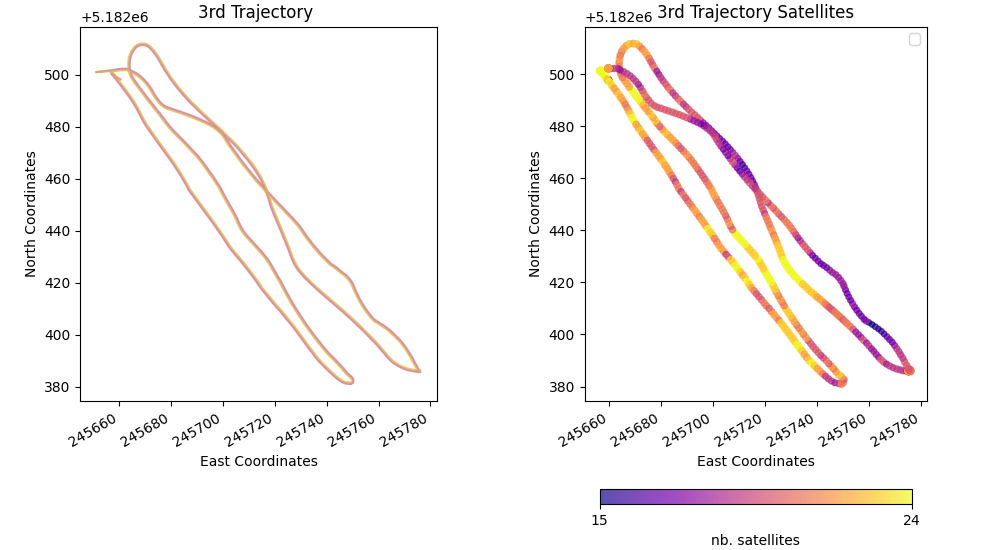

In [ ]:
# 2D figure
%matplotlib widget
fig, axs = plt.subplots(figsize=(10, 5.5), nrows=1, ncols=2, constrained_layout = True)
ax = axs[0]
ax2 = axs[1]
ax.plot(df1_traj_3['Easting'], df1_traj_3['Northing'], c='#89ABE3', label='antenna 1', alpha = 0.7)
ax.plot(df2_traj_3['Easting'], df2_traj_3['Northing'], c='#EA738D', label='antenna 2', alpha = 0.7)
ax.plot(df3_traj_3['Easting'], df3_traj_3['Northing'], c='#E3B448', label='antenna 3', alpha = 0.7)

ax.set_xlabel('East Coordinates')
ax.set_ylabel('North Coordinates')
ax.set_title('3rd Trajectory ')
ax.set_aspect('equal')
plt.legend()

sc = ax2.scatter(df1_traj_3['Easting'], df1_traj_3['Northing'],c=df1_traj_3['Sats'], cmap='plasma', s=df1_traj_3['Sats'], alpha=0.7)

divider = make_axes_locatable(ax2)
cbar = plt.colorbar(sc, orientation='horizontal', shrink = 0.65)
cbar.set_ticks([np.min(df1_traj_3['Sats']), np.max(df1_traj_3['Sats'])])
cbar.ax.set_xticklabels([f"${int(np.min(df1_traj_3['Sats']))}$", f"${int(np.max(df1_traj_3['Sats']))}$"])
cbar.set_label('nb. satellites')
ax2.set_xlabel('East Coordinates')
ax2.set_ylabel('North Coordinates')
ax2.set_title('3rd Trajectory Satellites')
ax2.set_aspect('equal')

plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax2.get_xticklabels(), rotation=30, horizontalalignment='right')

## 2. Compute transformation matrix $T_{LIDAR}^{GNSS}$

In [ ]:
sensors_positions_file = os.path.expanduser('~') + '/Master_thesis/ICRA2024_Effie_Daum/Extrinsic_calibration/' + '2023_07_04' + '/' + "sensor_position_lidar_frame.csv"

sensors = np.array(read_file(sensors_positions_file))
P1_lidar, P2_lidar, P3_lidar, G1_lidar, G2_lidar, G3_lidar = sensors[:6]

p_1 = np.array(G1_lidar)
p_2 = np.array(G2_lidar)
p_3 = np.array(G3_lidar)

p_1 = np.expand_dims(p_1, axis=1)
p_2 = np.expand_dims(p_2, axis=1)
p_3 = np.expand_dims(p_3, axis=1)

In [ ]:
traj1 = pd.merge(df1_traj_1[['Timestamp', 'Easting', 'Northing', 'Elevation', 'PDOP', 'Sats']], df2_traj_1[['Timestamp', 'Easting', 'Northing', 'Elevation', 'PDOP', 'Sats']], on=['Timestamp'])
traj1 = pd.merge(traj1, df3_traj_1[['Timestamp', 'Easting', 'Northing', 'Elevation', 'PDOP', 'Sats']], on=['Timestamp'])
traj2 = pd.merge(df1_traj_2[['Timestamp', 'Easting', 'Northing', 'Elevation', 'PDOP', 'Sats']], df2_traj_2[['Timestamp', 'Easting', 'Northing', 'Elevation', 'PDOP', 'Sats']], on=['Timestamp'])
traj2 = pd.merge(traj2, df3_traj_2[['Timestamp', 'Easting', 'Northing', 'Elevation', 'PDOP', 'Sats']], on=['Timestamp'])
traj3 = pd.merge(df1_traj_3[['Timestamp', 'Easting', 'Northing', 'Elevation', 'PDOP', 'Sats']], df2_traj_3[['Timestamp', 'Easting', 'Northing', 'Elevation', 'PDOP', 'Sats']], on=['Timestamp'])
traj3 = pd.merge(traj3, df3_traj_3[['Timestamp', 'Easting', 'Northing', 'Elevation', 'PDOP', 'Sats']], on=['Timestamp'])

for traj in [traj1, traj2, traj3] :
    poses = []
    for i in range(len(traj)) :
        q_1 = np.array([[traj['Easting_x'][i]], [traj['Northing_x'][i]], [traj['Elevation_x'][i]], [1]])
        q_2 = np.array([[traj['Easting_y'][i]], [traj['Northing_y'][i]], [traj['Elevation_y'][i]], [1]])
        q_3 = np.array([[traj['Easting'][i]], [traj['Northing'][i]], [traj['Elevation'][i]], [1]])

        P = np.hstack([p_1, p_2, p_3])
        Q = np.hstack([q_1, q_2, q_3])
        T = minimization(P,Q)

        Rot = R_scipy.from_matrix(T[:3,:3])
        quat = Rot.as_quat()
        poses.append([T[0][3], T[1][3], T[2][3], quat[0], quat[1], quat[2], quat[3], traj['PDOP_x'][i], traj['Sats_x'][i]])

    traj['X'], traj['Y'], traj['Z'], traj['qx'], traj['qy'], traj['qz'], traj['qw'], traj['PDOP'], traj['Sats'] = zip(*poses)

traj1 = traj1[['Timestamp','X','Y','Z','qx','qy','qz', 'qw', 'PDOP', 'Sats']]
traj2 = traj2[['Timestamp','X','Y','Z','qx','qy','qz', 'qw', 'PDOP', 'Sats']]
traj3 = traj3[['Timestamp','X','Y','Z','qx','qy','qz', 'qw', 'PDOP', 'Sats']]

In [ ]:
path1 = os.path.expanduser('~') + '/Master_thesis/RTS_project/data/20230725-1/ground_truth/groundtruth_gps_lidar.csv' 
traj1.to_csv(path1, index=False)
path2 = os.path.expanduser('~') + '/Master_thesis/RTS_project/data/20230725-2/ground_truth/groundtruth_gps_lidar.csv' 
traj2.to_csv(path2, index=False)
path3 = os.path.expanduser('~') + '/Master_thesis/RTS_project/data/20230725-3/ground_truth/groundtruth_gps_lidar.csv' 
traj3.to_csv(path3, index=False)

In [ ]:
print(traj1.head())

    Timestamp              X             Y          Z        qx        qy  \
0  1690296616  245657.057042  5.182503e+06  89.733270 -0.015966  0.011663   
1  1690296617  245657.058588  5.182503e+06  89.730276 -0.018007  0.003848   
2  1690296618  245657.056554  5.182503e+06  89.731052 -0.014523 -0.001018   
3  1690296619  245657.051343  5.182503e+06  89.740324 -0.011837  0.003821   
4  1690296620  245657.051563  5.182503e+06  89.737173 -0.012839  0.003805   

         qz        qw   PDOP  Sats  
0  0.992413  0.121351  1.251    23  
1  0.992492  0.120912  1.251    23  
2  0.992444  0.121834  1.251    23  
3  0.992448  0.122031  1.251    23  
4  0.992323  0.122944  1.251    23  


## 2.1 Plot transformation matrix $T_{LIDAR}^{GNSS}$


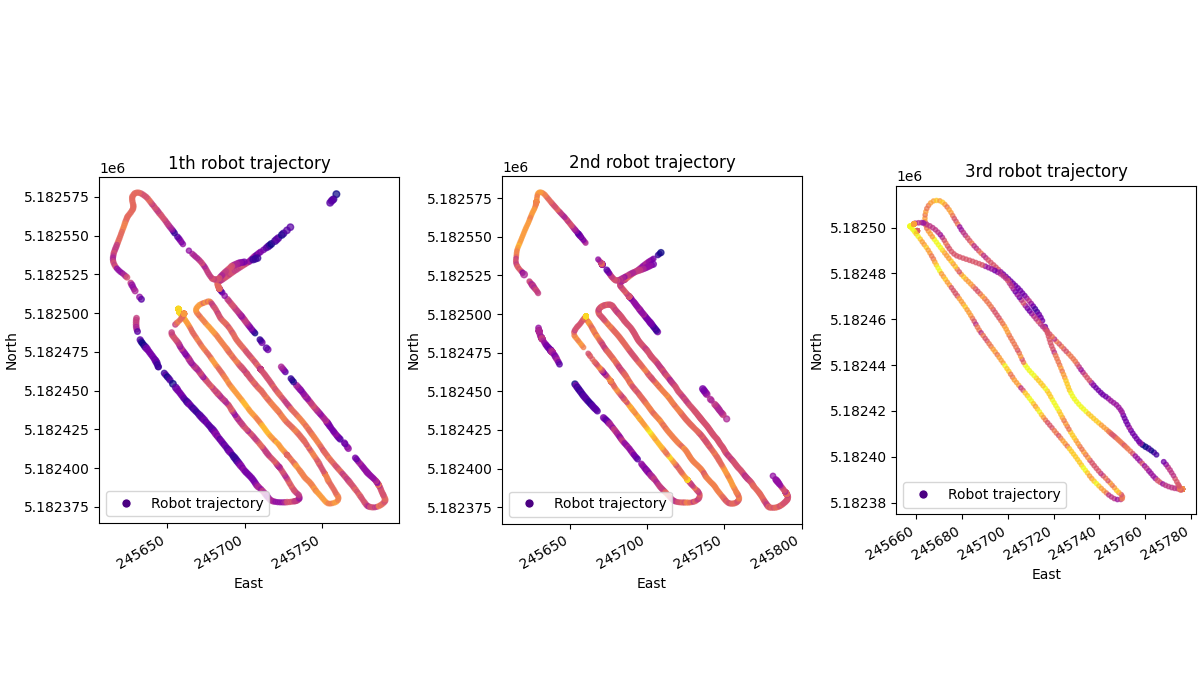

In [ ]:
%matplotlib widget
fig, axs = plt.subplots(figsize=(12, 7), nrows=1, ncols=3, constrained_layout = True)
ax = axs[0]
ax2 = axs[1]
ax3 = axs[2]


# ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=0.3, color='red', width=0.005)
# ax.quiver(X, Y, V, U, angles='xy', scale_units='xy', scale=0.3, color='green', width=0.005)
ax.scatter(traj1['X'],traj1['Y'], c=traj1['Sats'], cmap='plasma', s=traj1['PDOP']*8, alpha=0.7)

# ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=0.3, color='red', width=0.005)
# ax.quiver(X, Y, V, U, angles='xy', scale_units='xy', scale=0.3, color='green', width=0.005)
ax2.scatter(traj2['X'],traj2['Y'], c=traj2['Sats'], cmap='plasma', s=traj2['PDOP']*8, alpha=0.7)

# ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=0.3, color='red', width=0.005)
# ax.quiver(X, Y, V, U, angles='xy', scale_units='xy', scale=0.3, color='green', width=0.005)
ax3.scatter(traj3['X'],traj3['Y'] , c=traj3['Sats'], cmap='plasma', s=traj3['PDOP']*8, alpha=0.7)
     
legend_elements = [
    Line2D([0], [0], marker='o', color='white', markerfacecolor='indigo', markersize=7, label='Robot trajectory')]

ax.set_xlim()
ax.set_ylim()
ax.legend(handles=legend_elements, loc='lower left')
ax.ticklabel_format(useOffset=False)
ax.set_xlabel('East')
ax.set_ylabel('North')
ax.set_aspect('equal')
ax.set_title('1th robot trajectory')

ax2.set_xlim()
ax2.set_ylim()
ax2.legend(handles=legend_elements, loc='lower left')
ax2.ticklabel_format(useOffset=False)
ax2.set_xlabel('East')
ax2.set_ylabel('North')
ax2.set_aspect('equal')
ax2.set_title('2nd robot trajectory')

ax3.set_xlim()
ax3.set_ylim()
ax3.legend(handles=legend_elements, loc='lower left')
ax3.ticklabel_format(useOffset=False)
ax3.set_xlabel('East')
ax3.set_ylabel('North')
ax3.set_aspect('equal')
ax3.set_title('3rd robot trajectory')

plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax2.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax3.get_xticklabels(), rotation=30, horizontalalignment='right')

plt.show()

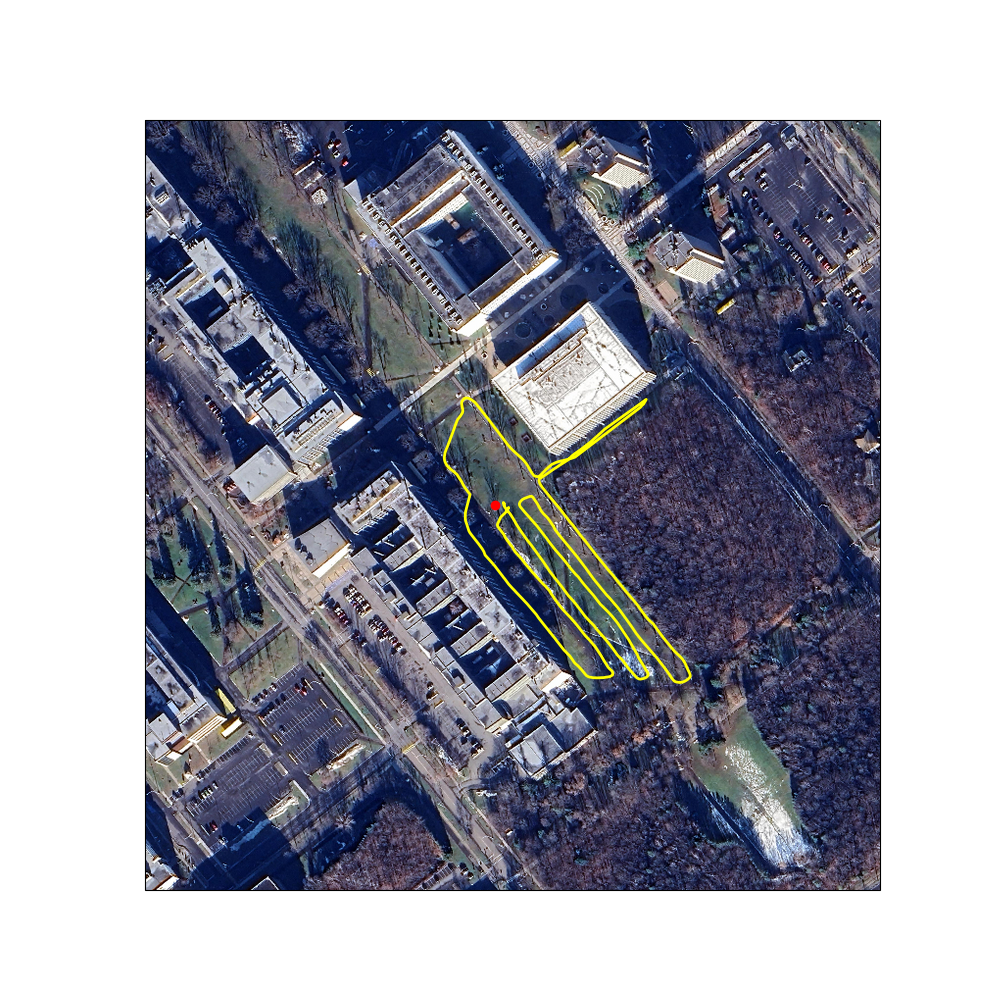

In [ ]:
import cartopy.crs as ccrs
from cartopy.io import img_tiles
from pyproj import Proj
import plotly.graph_objects as go
import matplotlib.pyplot as plt

east = 245651.009
north = 5182501.390

# world_map(east_0, north_0, 22, 50, 10, 10, 50, data, rovers)

# def world_map(east, north, tiler_size, width_left, width_right, height_down, height_up, data, rovers,point_scatter) :
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection= ccrs.epsg(2949))
tiler = img_tiles.GoogleTiles(desired_tile_form='RGB', style = 'satellite')
ax.add_image(tiler, 20, interpolation='spline36')
ax.set_xlabel("East")
ax.set_ylabel("North")  
# extent = [east - 100, east + 165, north - 165, north + 130] 
extent = [east - 250, east + 275, north - 275, north + 275]   
ax.set_extent(extent, crs = ccrs.epsg(2949))

ax.plot(traj1['X'], traj1['Y'], label = 'chemin expérimental', c = 'yellow', linewidth = 2, transform=ccrs.epsg(2949))
ax.plot(east, north, 'ro', transform = ccrs.epsg(2949))

# ax.set_title("")
# legend_elements = [
#     Line2D([0], [0], marker='o', color='white', markerfacecolor='red', markersize=7, label='Antenne de référence')]

# ax.legend(loc = "upper right")
plt.savefig(os.path.expanduser('~') + '/Master_thesis/Figures/vue_grand_axe.pdf')
# plt.show()